In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Gerando o Sinal e amostrando-o

In [81]:
frequencia = 5 
fs_continuo = 1000 
fs_amostrado = 10 * frequencia 

t_continuo = np.arange(0, 2, 1/fs_continuo)  
t_amostrado = np.arange(0, 2, 1/fs_amostrado) 

ruido_continuo = (np.sin(2 * np.pi * frequencia * t_continuo) + 
                  5 * np.sin(2 * np.pi * 0.4 * frequencia * t_continuo) + 
                  2 * np.sin(2 * np.pi * 0.1 * frequencia * t_continuo))

ruido_amostrado = (np.sin(2 * np.pi * frequencia * t_amostrado) + 
                   5 * np.sin(2 * np.pi * 0.4 * frequencia * t_amostrado) + 
                   2 * np.sin(2 * np.pi * 0.1 * frequencia * t_amostrado))


## Fazendo a interpolação do sinal amostrado por 3:

In [83]:
n = 3 

ruido_decimation = np.zeros(len(ruido_amostrado) * (n + 1)) 
ruido_decimation[::(n + 1)] = ruido_amostrado

t_decimation = np.arange(0, 2, 1/(fs_amostrado * (n + 1)))

## Passando os sinais por um filtro FIR :

In [146]:
cutoff_freq = frequencia * 2
numtaps = 101
nyquist_rate_continuo = fs_continuo / 2
nyquist_rate_amostrado = fs_amostrado / 2

filtro_fir_continuo = signal.firwin(numtaps, cutoff_freq / nyquist_rate_continuo)

sinal_filtrado_continuo = signal.lfilter(filtro_fir_continuo, 1.0, ruido_continuo)

filtro_fir_amostrado = signal.firwin(numtaps, cutoff_freq / nyquist_rate_amostrado)

sinal_filtrado_amostrado = signal.lfilter(filtro_fir_amostrado, 1.0, ruido_amostrado)

filtro_fir_decimation = signal.firwin(numtaps, cutoff_freq / (fs_amostrado * (n + 1) / 2))

sinal_filtrado_decimation = signal.lfilter(filtro_fir_decimation, 1.0, ruido_decimation)

## Sinal Contínuo antes e depois do filtro FIR:

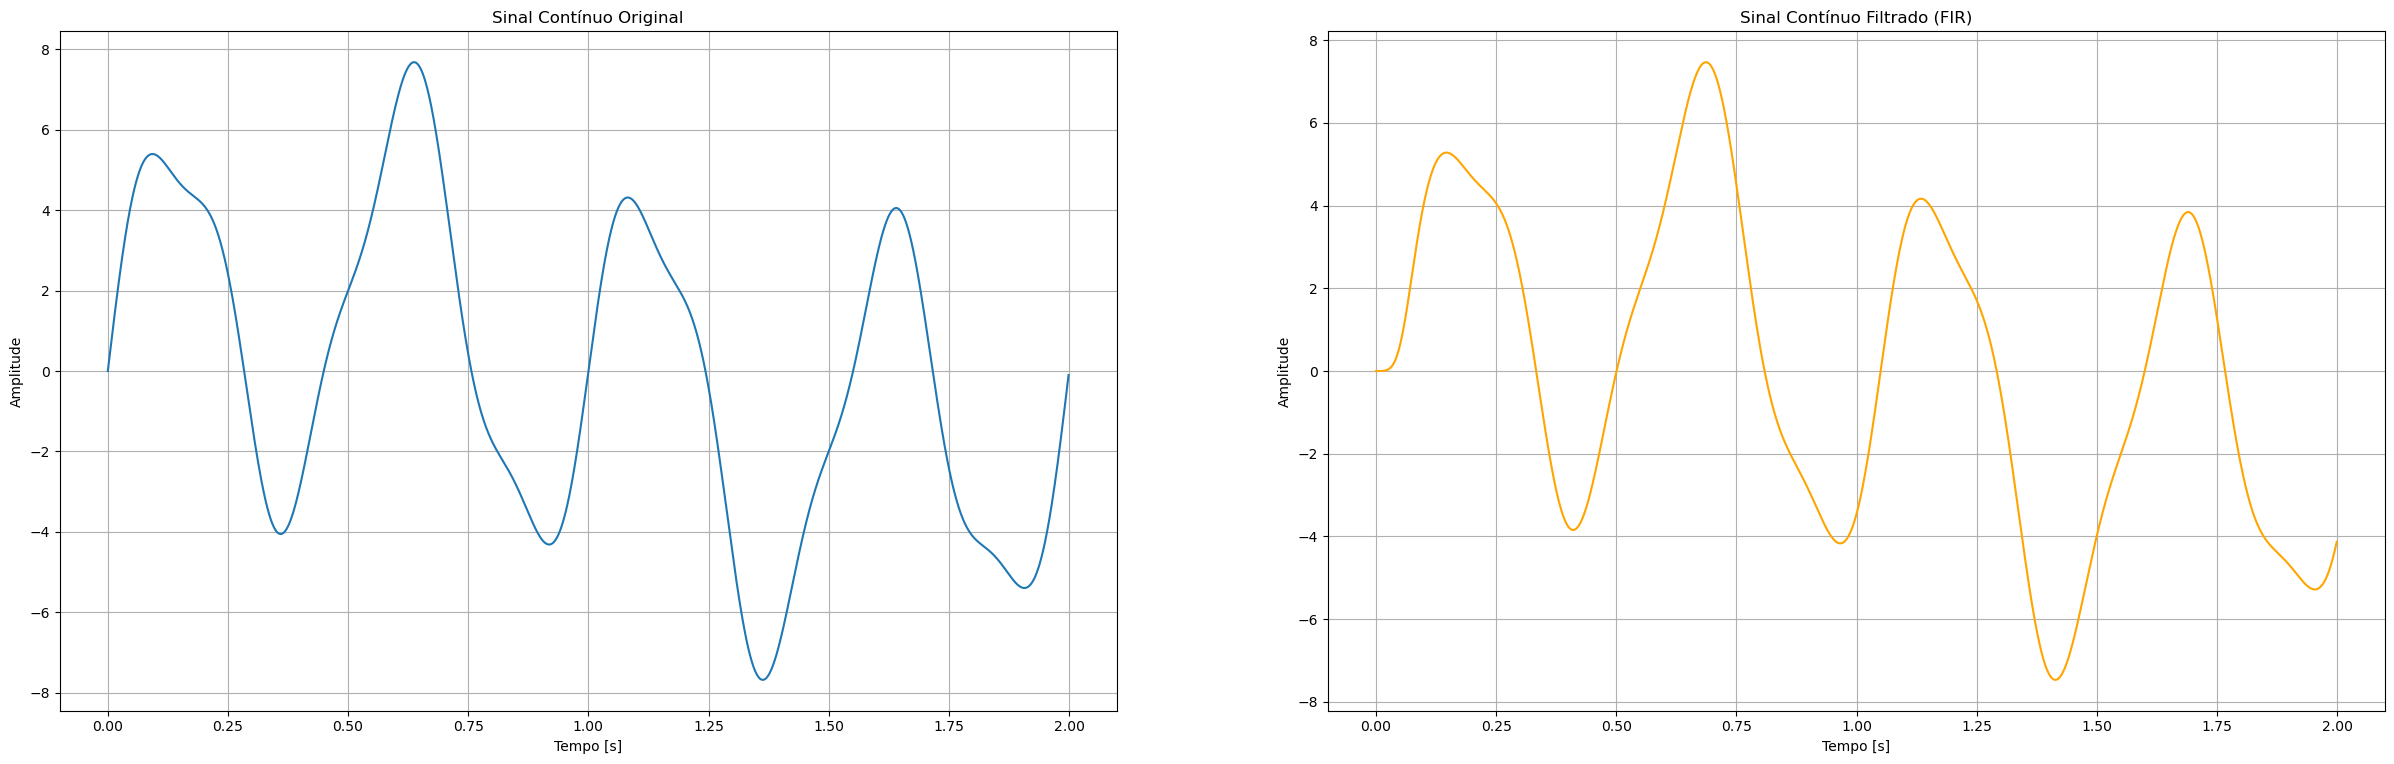

In [148]:
plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 1)
plt.plot(t_continuo, ruido_continuo, label='Original')
plt.title('Sinal Contínuo Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t_continuo, sinal_filtrado_continuo, label='Filtrado', color='orange')
plt.title('Sinal Contínuo Filtrado (FIR)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

## Sinal Amostrado antes e depois do Filtro FIR:

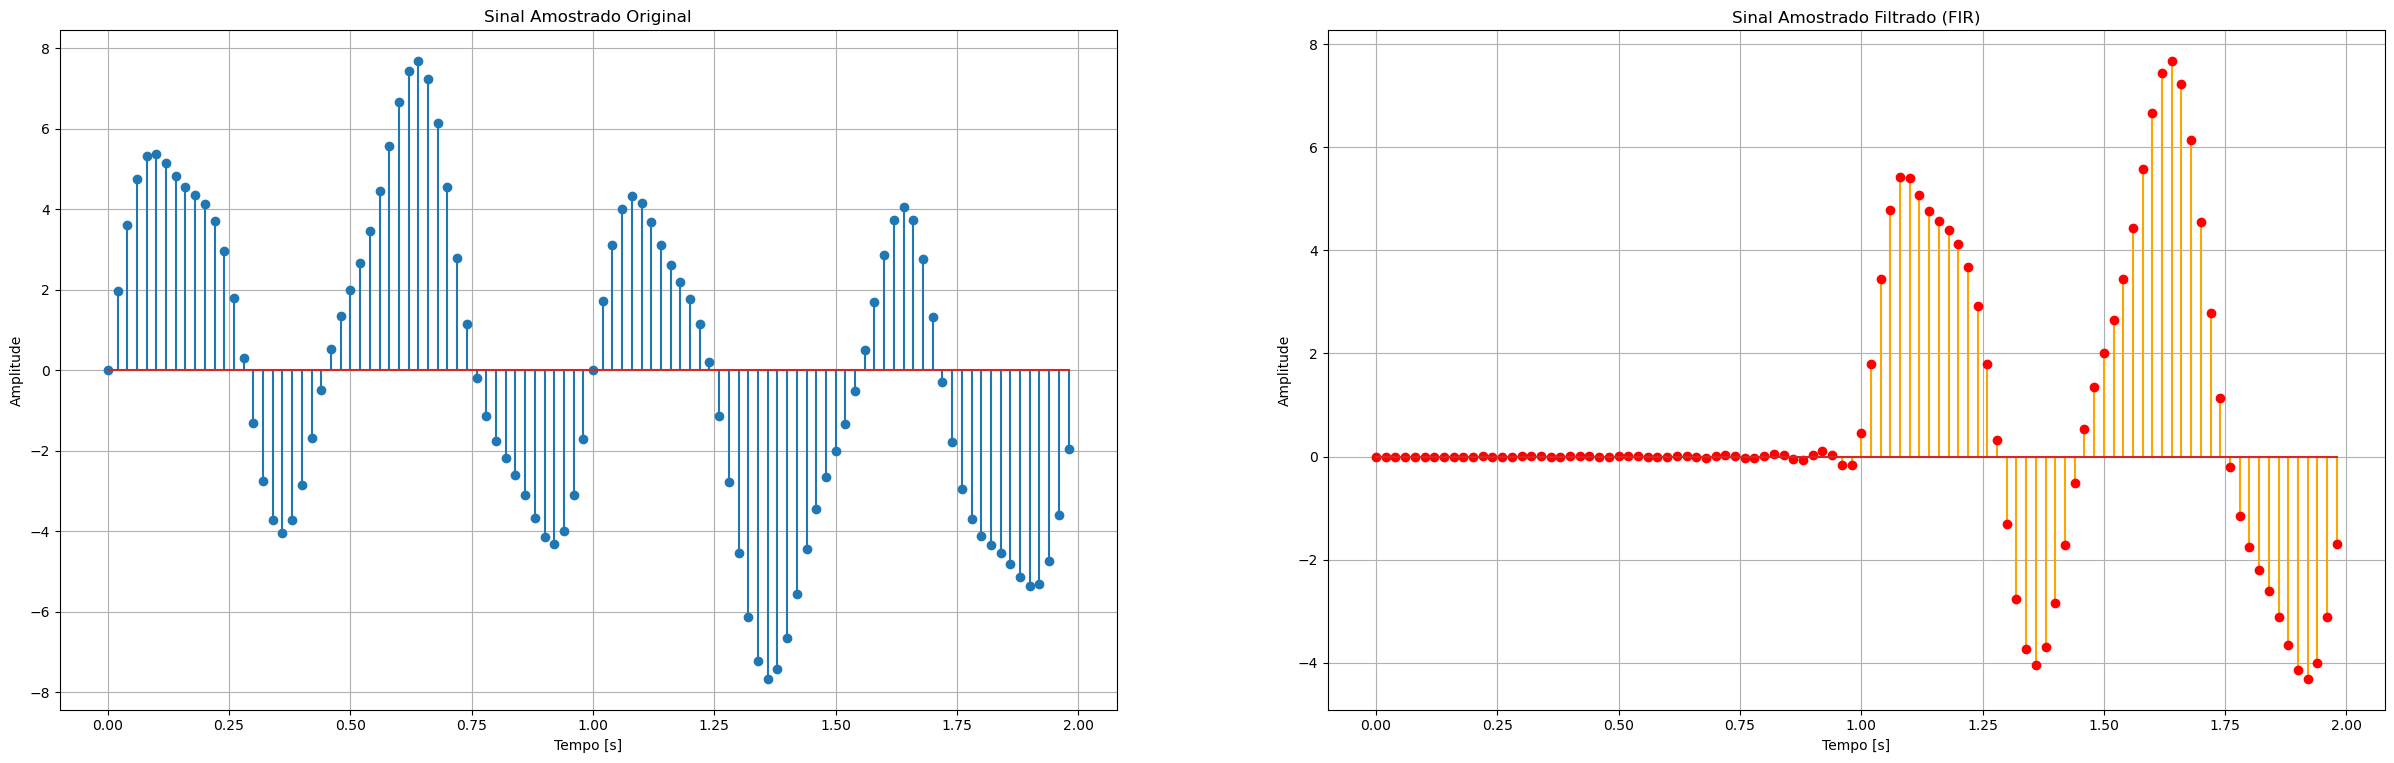

In [150]:
plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 3)
plt.stem(t_amostrado, ruido_amostrado, label='Original')
plt.title('Sinal Amostrado Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.stem(t_amostrado, sinal_filtrado_amostrado, label='Filtrado', linefmt='orange', markerfmt='ro')
plt.title('Sinal Amostrado Filtrado (FIR)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

## Sinal Interpolado antes e depois do Filtro FIR:

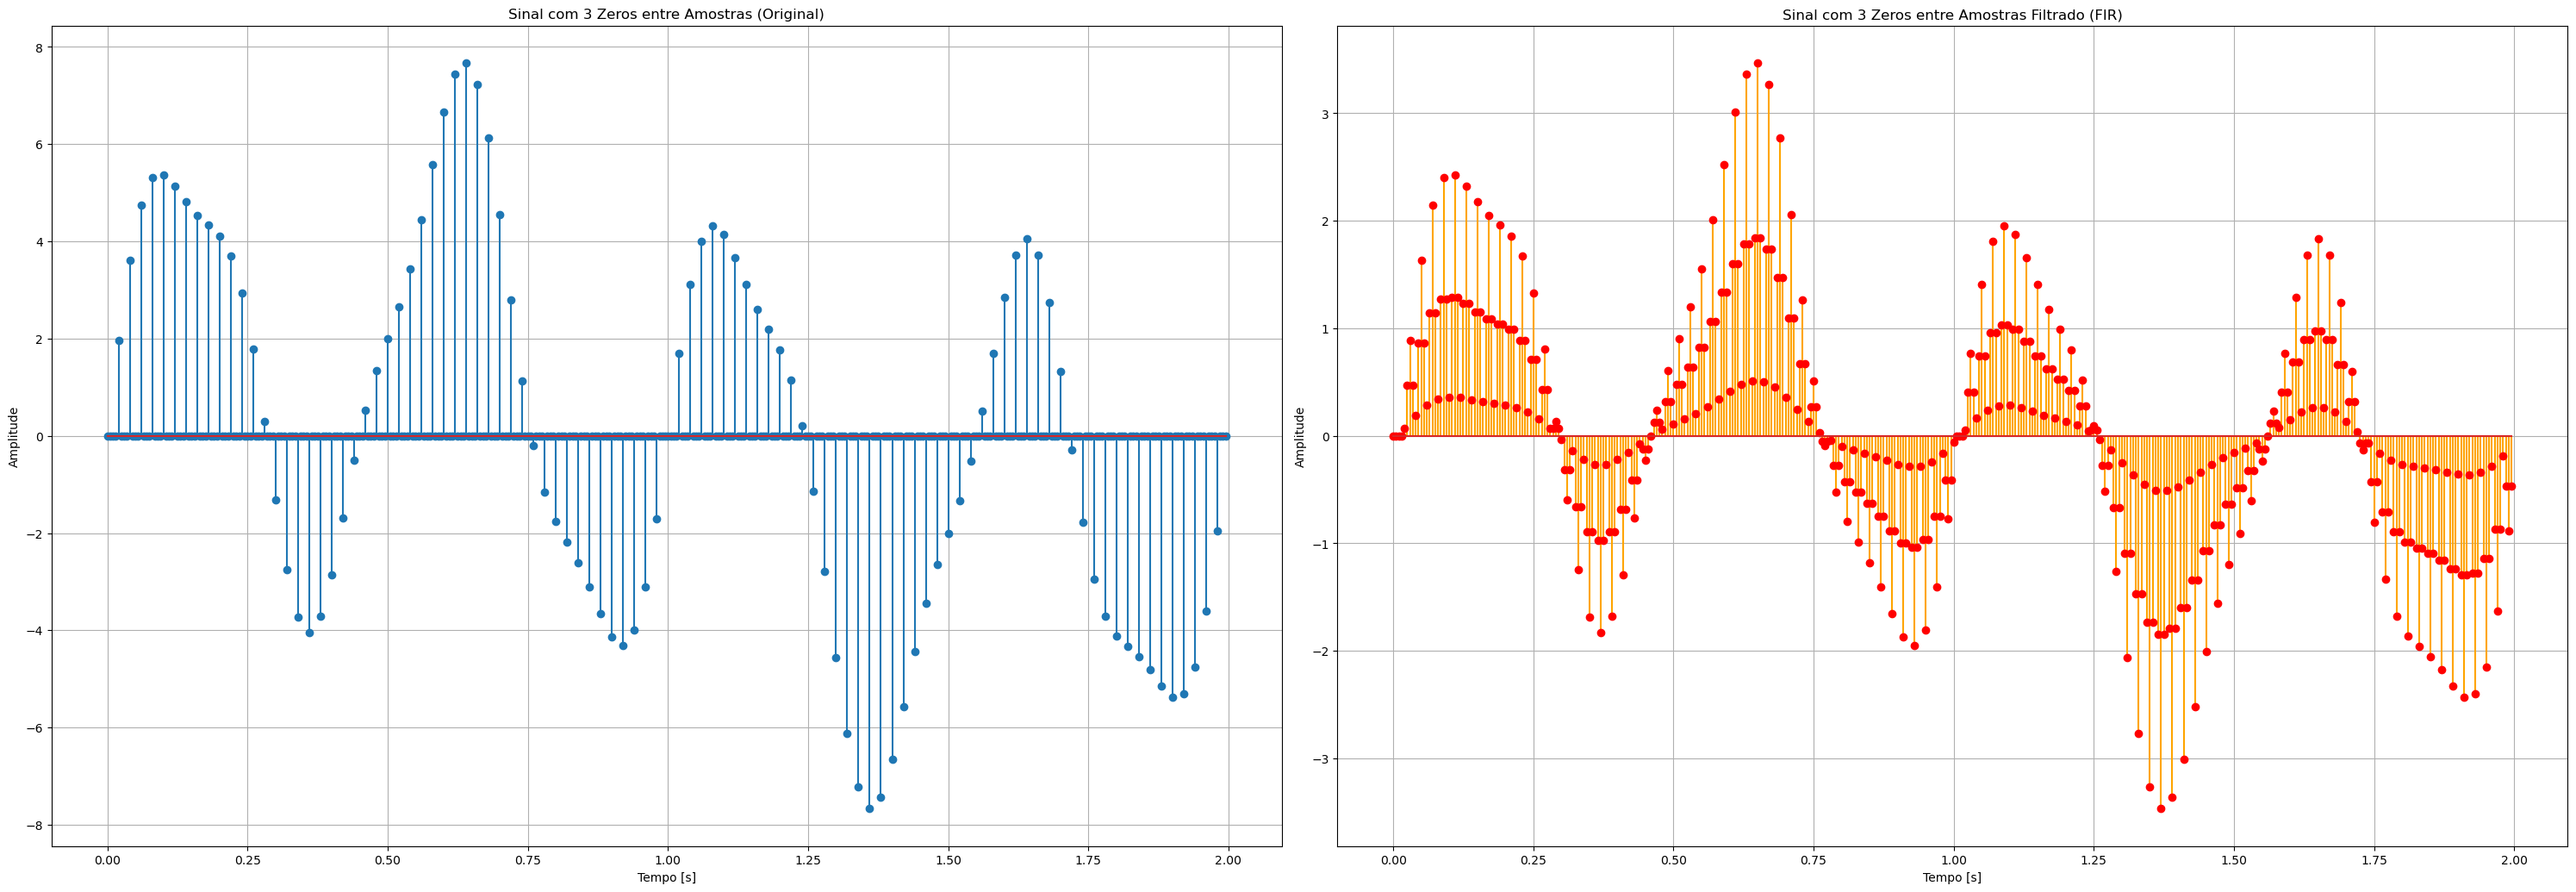

In [138]:
plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 5)
plt.stem(t_decimation, ruido_decimation, label='Original')
plt.title(f'Sinal com {n} Zeros entre Amostras (Original)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.stem(t_decimation, sinal_filtrado_decimation, label='Filtrado', linefmt='orange', markerfmt='ro')
plt.title(f'Sinal com {n} Zeros entre Amostras Filtrado (FIR)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
